In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns
import requests as requests

sns.set_style("whitegrid")

In [47]:
from utils.eth_blocks_utils import get_block_for_timestamp

In [75]:
end_block = get_block_for_timestamp(int(datetime.datetime.utcnow().timestamp()))
start_block = get_block_for_timestamp(int((datetime.datetime.utcnow() - datetime.timedelta(days=100)).timestamp()))

In [76]:
crv_depositor_contract = "0x8014595F2AB54cD7c604B00E9fb932176fDc86Ae"

In [77]:
query = f"https://api.etherscan.io/api?module=account&action=txlist&address={crv_depositor_contract}&startblock={start_block}&endblock={end_block}&sort=asc&page=1&offset=10000&apikey={os.environ['ETHERSCAN_API_KEY']}"
etherscan_api_response = requests.post(query)

In [78]:
crv_depositor_txes = etherscan_api_response.json()['result']
len(crv_depositor_txes)

6176

In [79]:
dict_crv_depositor_txes = {'timestamp': [], 'gas_price': [], 'block_number': []}
for tx in crv_depositor_txes:

    dict_crv_depositor_txes['gas_price'].append(float(tx['gasPrice']) * 1e-9)
    dict_crv_depositor_txes['timestamp'].append(datetime.datetime.fromtimestamp(int(tx['timeStamp'])))
    dict_crv_depositor_txes['block_number'].append(datetime.datetime.fromtimestamp(int(tx['blockNumber'])))


In [80]:
df_crv_lock_txes = pd.DataFrame(dict_crv_depositor_txes)
df_crv_lock_txes.set_index('timestamp', inplace=True)
df_crv_lock_txes

,gas_price,block_number
timestamp,,
2021-07-27 11:32:41,21.000000,1970-05-30 10:22:43
2021-07-27 11:49:19,24.000000,1970-05-30 10:23:48
2021-07-27 13:11:15,24.000000,1970-05-30 10:29:14
2021-07-27 14:46:50,30.000000,1970-05-30 10:36:04
2021-07-27 15:17:32,36.000000,1970-05-30 10:37:50
...,...,...
2021-11-04 10:27:05,129.410000,1970-06-06 20:43:46
2021-11-04 10:45:27,97.519973,1970-06-06 20:45:08
2021-11-04 11:04:32,125.109539,1970-06-06 20:46:21


In [84]:
df_depositor_txes = pd.DataFrame()
df_depositor_txes['avg_gas'] = df_crv_lock_txes.groupby(pd.Grouper(freq='1D'))['gas_price'].mean()
df_depositor_txes['median_gas'] = df_crv_lock_txes.groupby(pd.Grouper(freq='1D'))['gas_price'].median()
df_depositor_txes['num_txes'] = df_crv_lock_txes.groupby(pd.Grouper(freq='1D'))['gas_price'].count()

df_depositor_txes

,avg_gas,median_gas,num_txes
timestamp,,,
2021-07-27,31.066667,30.000000,15
2021-07-28,30.688060,29.000000,67
2021-07-29,25.941667,25.000000,60
2021-07-30,29.262164,28.000000,61
2021-07-31,26.064756,22.000000,82
...,...,...,...
2021-10-31,132.339146,126.084864,42
2021-11-01,131.660806,120.814812,52
2021-11-02,150.386391,148.853231,31


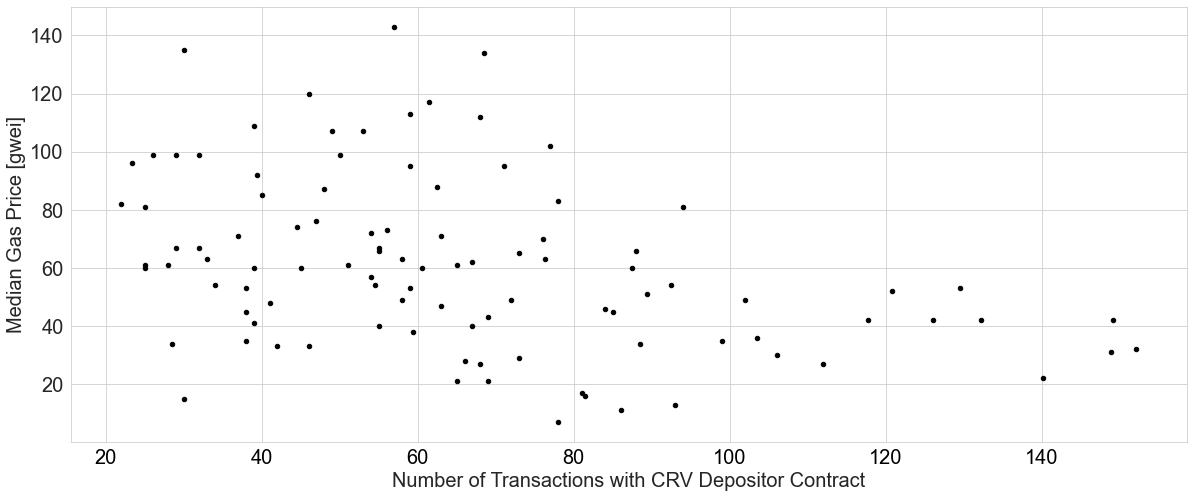

In [85]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.scatter(
    df_depositor_txes.median_gas,
    df_depositor_txes.num_txes,
    s=20,
    color='black',
)

ax.set_ylabel("Median Gas Price [gwei]", fontsize=20)
ax.set_xlabel("Number of Transactions with CRV Depositor Contract", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')